In [1]:
import pandas as pd
df = pd.read_csv("kelulusan_mahasiswa.csv")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IPK                10 non-null     float64
 1   Jumlah_Absensi     10 non-null     int64  
 2   Waktu_Belajar_Jam  10 non-null     int64  
 3   Lulus              10 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 448.0 bytes
None
   IPK  Jumlah_Absensi  Waktu_Belajar_Jam  Lulus
0  3.8               3                 10      1
1  2.5               8                  5      0
2  3.4               4                  7      1
3  2.1              12                  2      0
4  3.9               2                 12      1


Missing values per kolom:
IPK                  0
Jumlah_Absensi       0
Waktu_Belajar_Jam    0
Lulus                0
dtype: int64
Missing value pada kolom IPK diisi dengan median: 3.0
Missing value pada kolom Jumlah_Absensi diisi dengan median: 5.5
Missing value pada kolom Waktu_Belajar_Jam diisi dengan median: 6.0
Missing value pada kolom Lulus diisi dengan median: 0.5


C:\Users\HP\AppData\Local\Temp\ipykernel_9316\3942258116.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9316\3942258116.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

<Axes: xlabel='IPK'>

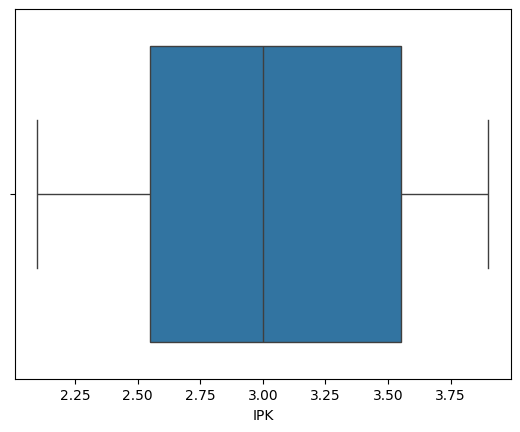

In [2]:
import pandas as pd
import seaborn as sns


print("Missing values per kolom:")
print(df.isnull().sum())


df = df.drop_duplicates()


for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:  
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f"Missing value pada kolom {col} diisi dengan median: {median_value}")
    else:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
        print(f"Missing value pada kolom {col} diisi dengan modus: {mode_value}")


sns.boxplot(x=df['IPK'])


Statistik deskriptif untuk kolom numerik:
             IPK  Jumlah_Absensi  Waktu_Belajar_Jam      Lulus
count  10.000000        10.00000          10.000000  10.000000
mean    3.030000         6.00000           6.400000   0.500000
std     0.639531         3.05505           3.306559   0.527046
min     2.100000         2.00000           2.000000   0.000000
25%     2.550000         4.00000           4.000000   0.000000
50%     3.000000         5.50000           6.000000   0.500000
75%     3.550000         7.75000           8.750000   1.000000
max     3.900000        12.00000          12.000000   1.000000


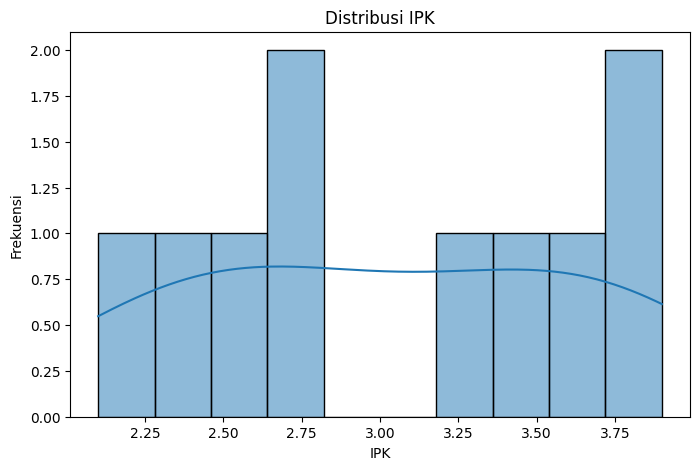

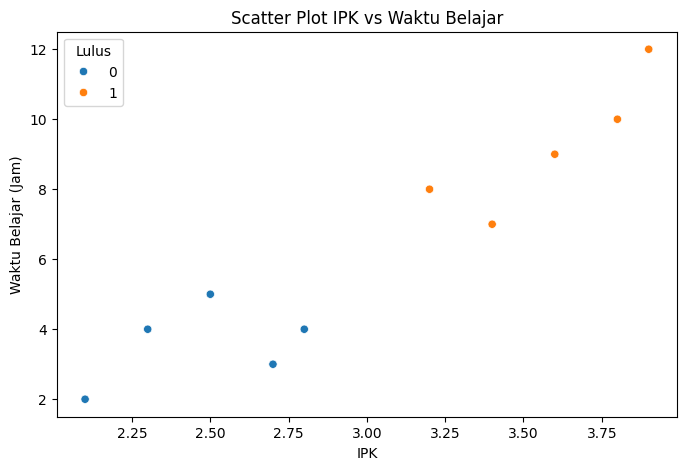

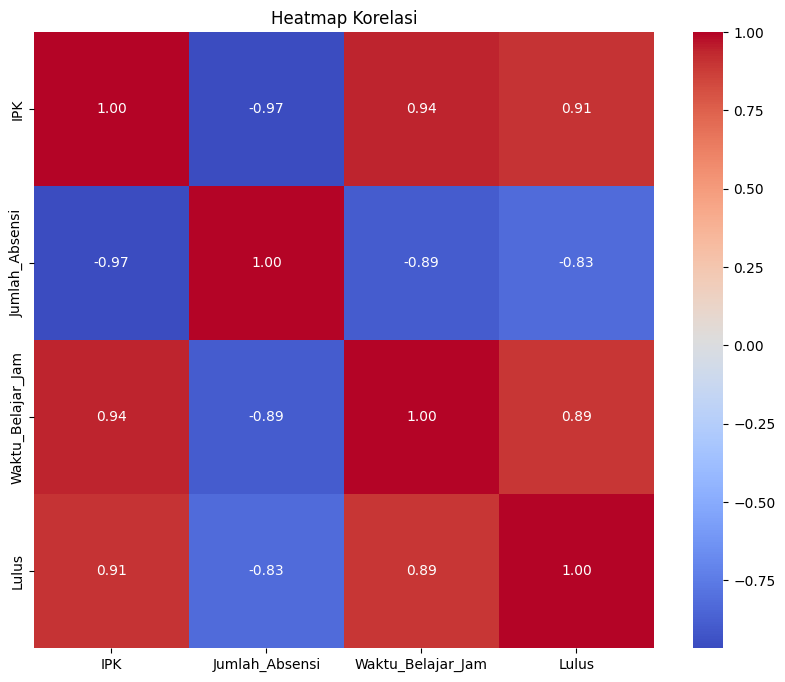

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


print("Statistik deskriptif untuk kolom numerik:")
print(df.describe())


plt.figure(figsize=(8,5))
sns.histplot(df['IPK'], bins=10, kde=True)
plt.title('Distribusi IPK')
plt.xlabel('IPK')
plt.ylabel('Frekuensi')
plt.show()


plt.figure(figsize=(8,5))
sns.scatterplot(x='IPK', y='Waktu_Belajar_Jam', data=df, hue='Lulus')
plt.title('Scatter Plot IPK vs Waktu Belajar')
plt.xlabel('IPK')
plt.ylabel('Waktu Belajar (Jam)')
plt.show()


plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

In [5]:
import pandas as pd


df['Rasio_Absensi'] = df['Jumlah_Absensi'] / 14
df['IPK_x_Study'] = df['IPK'] * df['Waktu_Belajar_Jam']


print(df.head())


df.to_csv("processed_kelulusan.csv", index=False)
print("Dataset sudah disimpan sebagai processed_kelulusan.csv")


   IPK  Jumlah_Absensi  Waktu_Belajar_Jam  Lulus  Rasio_Absensi  IPK_x_Study
0  3.8               3                 10      1       0.214286         38.0
1  2.5               8                  5      0       0.571429         12.5
2  3.4               4                  7      1       0.285714         23.8
3  2.1              12                  2      0       0.857143          4.2
4  3.9               2                 12      1       0.142857         46.8
Dataset sudah disimpan sebagai processed_kelulusan.csv


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split


data = {
    "IPK": [3.8,2.5,3.4,2.1,3.9,2.8,3.2,2.7,3.6,2.3],
    "Jumlah_Absensi": [3,8,4,12,2,6,5,7,4,9],
    "Waktu_Belajar_Jam": [10,5,7,2,12,4,8,3,9,4],
    "Lulus": [1,0,1,0,1,0,1,0,1,0]
}

df = pd.DataFrame(data)


X = df.drop("Lulus", axis=1)
y = df["Lulus"]


X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)


X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)


train_df = pd.concat([X_train, y_train], axis=1)
val_df = pd.concat([X_val, y_val], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)


summary = pd.DataFrame({
    "Subset": ["Train", "Validation", "Test"],
    "Jumlah_Baris": [len(train_df), len(val_df), len(test_df)],
    "Jumlah_Lulus_1": [train_df['Lulus'].sum(), val_df['Lulus'].sum(), test_df['Lulus'].sum()],
    "Jumlah_Lulus_0": [
        len(train_df)-train_df['Lulus'].sum(),
        len(val_df)-val_df['Lulus'].sum(),
        len(test_df)-test_df['Lulus'].sum()
    ]
})

print("Ringkasan jumlah baris tiap subset:")
print(summary)


train_df.to_csv("train.csv", index=False)
val_df.to_csv("validation.csv", index=False)
test_df.to_csv("test.csv", index=False)


Ringkasan jumlah baris tiap subset:
       Subset  Jumlah_Baris  Jumlah_Lulus_1  Jumlah_Lulus_0
0       Train             7               4               3
1  Validation             1               0               1
2        Test             2               1               1
